In [1]:
import xarray as xr 
import pandas as pd
import numpy as np
import datetime
from datetime import timedelta
import calendar

import dataretrieval.nwis as nwis
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
# Query USGS server and get basic info for USGS site
def get_info_USGSsite(sitecode):
    from pygeohydro import NWIS
 
    query = {
        "site": "%s"%(sitecode)
    }
    info = NWIS().get_info(query)
    return info

# Query USGS server and get upstream contributing area for USGS site
def get_UpstreamBasin_USGSsite(sitecode):
    from pynhd import NLDI
    
    basin = NLDI().get_basins([sitecode])
    basin = basin.to_crs('EPSG:4326')
    return basin


In [3]:
# read ATS data 
ats_data = pd.DataFrame()
##################################################################################################################################
# Cossatot River 	AR 	230.63       	  "7340300"
#ats_fname = "/home/jbk/projects/climate/interface/ats/water_balance_computational_domain_CossatotRiverSMD1.33.csv"
#usgs_sitecode = "7340300"
dict = {'sitename': ['Cossato_River'],
        'station_nm': [''],
        'fname':    ['/home/jbk/projects/climate/interface/ats/water_balance_computational_domain_CossatotRiverSMD1.33.csv'],
        'usgs_sitecode': ['07340300'],
        'lat':      [0],
        'lon':      [0],
        'huc8':     ['']
       }
ats_data = ats_data.append(pd.DataFrame(dict), ignore_index=True)

## Flatbrook 	NJ 	165.76 	  "1440000"
#ats_fname = "/home/jbk/projects/climate/interface/ats/water_balance_computational_domain_Flatbrook_exp6SMD1.33.csv"
#usgs_sitecode = "1440000"
dict = {'sitename': ['Flatbrook_River'],
        'station_nm': [''],
        'fname':    ['/home/jbk/projects/climate/interface/ats/water_balance_computational_domain_Flatbrook_exp6SMD1.33.csv'],
        'usgs_sitecode': ['01440000'],
        'lat':      [0],
        'lon':      [0],
        'huc8':     ['']
       }
ats_data = ats_data.append(pd.DataFrame(dict), ignore_index=True)

## Mayo river 	VA 	218.34 	  "02069700"
#ats_fname = "/home/jbk/projects/climate/interface/ats/water_balance_computational_domain_MayoRiverSMD1.33.csv"
#usgs_sitecode = "02069700"
dict = {'sitename': ['Mayo_River'],
        'station_nm': [''],
        'fname':    ['/home/jbk/projects/climate/interface/ats/water_balance_computational_domain_MayoRiverSMD1.33.csv'],
        'usgs_sitecode': ['02069700'],
        'lat':      [0],
        'lon':      [0],
        'huc8':     ['']
       }
ats_data = ats_data.append(pd.DataFrame(dict), ignore_index=True)

## Neversink River 	NY 	160.6 	  "01435000"
#ats_fname = "/home/jbk/projects/climate/interface/ats/water_balance_computational_domain_NeversinkHeadwatersSMD1.33.csv"
#usgs_sitecode = "01435000"
dict = {'sitename': ['Neversink_River'],
        'station_nm': [''],
        'fname':    ['/home/jbk/projects/climate/interface/ats/water_balance_computational_domain_NeversinkHeadwatersSMD1.33.csv'],
        'usgs_sitecode': ['01435000'],
        'lat':      [0],
        'lon':      [0],
        'huc8':     ['']
       }
ats_data = ats_data.append(pd.DataFrame(dict), ignore_index=True)

## Taylor upstream 	CO 	331.52 	  "09107000"
#ats_fname = "/home/jbk/projects/climate/interface/ats/water_balance_computational_domain_TaylorUpstreamLULCSMD1.33.csv"
#usgs_sitecode = "09107000"
dict = {'sitename': ['Taylor_River'],
        'station_nm': [''],
        'fname':    ['/home/jbk/projects/climate/interface/ats/water_balance_computational_domain_TaylorUpstreamLULCSMD1.33.csv'],
        'usgs_sitecode': ['09107000'],
        'lat':      [0],
        'lon':      [0],
        'huc8':     ['']
       }
ats_data = ats_data.append(pd.DataFrame(dict), ignore_index=True)

## Little Tennessee 	NC,VA 	362.6 	  "03500000"
#ats_fname = "/home/jbk/projects/climate/interface/ats/water_balance_LittleTennessee_exp6SMD1.33.dat"
#usgs_sitecode = "03500000"
dict = {'sitename': ['LittleTN_River'],
        'station_nm': [''],
        'fname':    ['/home/jbk/projects/climate/interface/ats/water_balance_LittleTennessee_exp6SMD1.33.dat'],
        'usgs_sitecode': ['03500000'],
        'lat':      [0],
        'lon':      [0],
        'huc8':     ['']
       }
ats_data = ats_data.append(pd.DataFrame(dict), ignore_index=True)

## Panther creek 	AL 	227.14     	  "02369800"
#ats_fname = "/home/jbk/projects/climate/interface/ats/water_balance_PantherCreek_exp6SMD1.33.dat"
#usgs_sitecode = "02369800"
dict = {'sitename': ['Pather_Creek'],
        'station_nm': [''],
        'fname':    ['/home/jbk/projects/climate/interface/ats/water_balance_PantherCreek_exp6SMD1.33.dat'],
        'usgs_sitecode': ['02369800'],
        'lat':      [0],
        'lon':      [0],
        'huc8':     ['']
       }
ats_data = ats_data.append(pd.DataFrame(dict), ignore_index=True)

##################################################################################################################################

# Check site info and add lat/lon/huc8 for each site 
for u in ats_data['usgs_sitecode']:
    site_info = nwis.get_record(site=u, service='site')
    ats_data.loc[ats_data['usgs_sitecode'] == u, 'lat'] = site_info.dec_lat_va.values[0]
    ats_data.loc[ats_data['usgs_sitecode'] == u, 'lon'] = site_info.dec_long_va.values[0]
    ats_data.loc[ats_data['usgs_sitecode'] == u, 'station_nm'] = site_info.station_nm.values[0]
    if len(site_info.huc_cd[0].astype(str)) != 8:
        ats_data.loc[ats_data['usgs_sitecode'] == u, 'huc8'] = '0'+site_info.huc_cd.values[0].astype(str)
    else:
        ats_data.loc[ats_data['usgs_sitecode'] == u, 'huc8'] = site_info.huc_cd.values[0].astype(str)


# All ATS days start from 1980-01-01
#basedate=datetime.datetime.strptime("1/1/1980", "%m/%d/%Y")
basedate = pd.Timestamp('1980-01-01 00:00:00+00:00')

/tmp/ipykernel_443814/1860365770.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ats_data = ats_data.append(pd.DataFrame(dict), ignore_index=True)
/tmp/ipykernel_443814/1860365770.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ats_data = ats_data.append(pd.DataFrame(dict), ignore_index=True)
/tmp/ipykernel_443814/1860365770.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ats_data = ats_data.append(pd.DataFrame(dict), ignore_index=True)
/tmp/ipykernel_443814/1860365770.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ats_data = ats_data.append(pd.DataFrame(dict), ignore_index=True)
/tmp/ipykernel_443814/1860365770.py:

In [4]:

ats_data

,sitename,station_nm,fname,usgs_sitecode,lat,lon,huc8
0,Cossato_River,"Cossatot River near Vandervoort, AR",/home/jbk/projects/climate/interface/ats/water...,07340300,34.380000,-94.236389,11140109
1,Flatbrook_River,Flat Brook near Flatbrookville NJ,/home/jbk/projects/climate/interface/ats/water...,01440000,41.106111,-74.952500,02040104
2,Mayo_River,"SOUTH MAYO RIVER NEAR NETTLERIDGE, VA",/home/jbk/projects/climate/interface/ats/water...,02069700,36.570971,-80.129493,03010103
3,Neversink_River,NEVERSINK RIVER NEAR CLARYVILLE NY,/home/jbk/projects/climate/interface/ats/water...,01435000,41.889944,-74.589806,02040104
4,Taylor_River,"TAYLOR RIVER AT TAYLOR PARK, CO.",/home/jbk/projects/climate/interface/ats/water...,09107000,38.860271,-106.566697,14020001
5,LittleTN_River,"LITTLE TENNESSEE RIVER NEAR PRENTISS, NC",/home/jbk/projects/climate/interface/ats/water...,03500000,35.150000,-83.379722,06010202
6,Pather_Creek,BLACKWATER RIVER NEAR BRADLEY AL,/home/jbk/projects/climate/interface/ats/water...,02369800,31.027680,-86.709957,03140104


In [5]:
def read_ats_obs(ats_fname):
    # Read ATS data
    ats_df = pd.read_csv(ats_fname, delimiter=',', comment='#')
    leapyears=[y for y in range((basedate + pd.to_timedelta(ats_df['time [d]'].iloc[0], 'd')).year, (basedate + pd.to_timedelta(ats_df['time [d]'].iloc[-1], 'd')).year + 1) if calendar.isleap(y)]

    # add missing date in leap years
    for y in leapyears:
        if (pd.Timestamp('%d-12-30 00:00:00+00:00'%(y)) > (basedate + pd.to_timedelta(ats_df['time [d]'].iloc[0], 'd'))) and (pd.Timestamp('%d-12-30 00:00:00+00:00'%(y)) < (basedate + pd.to_timedelta(ats_df['time [d]'].iloc[-1], 'd'))):
#            print("We need to add date 12/31/%d to the time series: day %d index %d"%(y, (pd.to_datetime("12/31/%d"%(y)) - pd.to_datetime("1/1/1980")).days, ats_df[ats_df['time [d]'] == (pd.to_datetime("12/30/%d"%(y)) - pd.to_datetime("1/1/1980")).days].index[0]+1))
            row=ats_df.loc[[ats_df[ats_df['time [d]']==(pd.Timestamp('%d-12-30 00:00:00+00:00'%(y)) - pd.Timestamp('1980-01-01 00:00:00+00:00')).days].index[0]],:]
#            print('Row: old time %d'%(row['time [d]']))
            ats_df['time [d]'].mask(ats_df['time [d]'] > (pd.Timestamp('%d-12-30 00:00:00+00:00'%(y)) - pd.Timestamp('1980-01-01 00:00:00+00:00')).days, ats_df['time [d]'] + 1, inplace=True)
            row['time [d]'] = (pd.Timestamp('%d-12-30 00:00:00+00:00'%(y)) - pd.Timestamp('1980-01-01 00:00:00+00:00')).days + 1
            row.index = [ats_df[ats_df['time [d]'] == (pd.Timestamp('%d-12-30 00:00:00+00:00'%(y)) - pd.Timestamp('1980-01-01 00:00:00+00:00')).days].index[0]]
            ats_df = pd.concat([ats_df,row]).sort_index()
#            print('Row: new time %d'%(row['time [d]']))
 
#        else:
#            print("Leap day 2/29/%d falls outside simulation time period"%(y))
        
    # make datetime the index for the dataframe
    ats_df['date'] = basedate + pd.to_timedelta(ats_df['time [d]'], 'd')
    ats_df.set_index(pd.DatetimeIndex(ats_df.date), inplace=True)
    ats_df['date'] = basedate + pd.to_timedelta(ats_df['time [d]'], 'd')
    ofname=ats_fname+'.mod'
    ats_df.to_csv(ofname)
    return ats_df
    


In [6]:
lat = ats_data.lat.to_numpy()
lat.dtype
variables=ats_df.columns
ats_df[variables[0]].to_numpy()
#variables[1]

NameError: name 'ats_df' is not defined

In [7]:
# Create single netcdf file combining all sites
def create_netcdf_allsites(ats_data):
    # read first site so we can get the time array and length of time
    s = ats_data['sitename'][0]
    ats_df = read_ats_obs(ats_data[ats_data['sitename']==s]['fname'].values[0])
    edates = ats_df.date
    # define dimension variables
    nsites=ats_data.shape[0] # number of sites
    nb = 2 # num of coordinates
    time = len(ats_df.date)
    
    # get list of variables from the first ats sites
    variables = ats_df.columns
    variables = variables.drop(['date', 'time [d]']) # drop time variables since we are encoding them separately/differently
    
    # create time array in seconds from first date
    # calculate days from the first date
    t  = np.array([t.total_seconds()/3600/24 for t in (ats_df.date-ats_df.date[0])])
    # create time bounds array
    tb = np.array([t,t+1]).T
    
    # Create array for other variables we will fill for each sites
    lat = ats_data.lat.to_numpy()
    lon = ats_data.lon.to_numpy()
    station_nm = ats_data.station_nm.to_numpy()
    huc8 = ats_data.huc8.to_numpy()
    usgs_sitecode = ats_data.usgs_sitecode.to_numpy()
    
    # create numpy variables to populate with data from each site
    for s in ats_data['sitename']:
        # read ats data 
        ats_df = read_ats_obs(ats_data[ats_data['sitename']==s]['fname'].values[0])
 
    ############################################################
    # create xarray dataset
    out_ds = xr.Dataset({})
    
    # add 1D variables
    # add coordinates of the sites where the observations are located from model and the USGS stations
    out_ds['lat'] = (('nsites'), lat)
    out_ds['lat'].attrs['standard_name'] = 'latitude'
    out_ds['lat'].attrs['long_name'] = 'site latitude'
    out_ds['lat'].attrs['units'] = 'degrees_north'

    out_ds['lon'] = (('nsites'), lon)
    out_ds['lon'].attrs['standard_name'] = 'longitude'
    out_ds['lon'].attrs['long_name'] = 'site longitude'
    out_ds['lon'].attrs['units'] = 'degrees_east'

    # update time variable attrs
    out_ds['time'] = (('time'), t)
    out_ds['time_bounds'] = (('time', 'nb'), tb)
    out_ds['time'].attrs['units'] = "days since %s" % ats_df.date[0]
    out_ds['time'].attrs['calendar'] = "standard"
    out_ds['time'].attrs['bounds'] = "time_bounds"
        
    # add watershed name
    out_ds['usgs_sitename'] = (('nsites'), station_nm)
    out_ds['usgs_sitename'].attrs['long_name'] = 'USGS Site Name'

    # add huc8 name
    out_ds['huc8'] = (('nsites'), huc8)
    out_ds['huc8'].attrs['long_name'] = 'HUC 8 for the location.'

    # add usgs site code
    out_ds['usgs_code'] = (('nsites'), usgs_sitecode)
    out_ds['usgs_code'].attrs['long_name'] = 'USGS Sitecode.'
    ############################################################
    
    # Loop over all variable, then for each site and add to netcdf
    
    for v in variables:
        tempvar = np.zeros((time, nsites))
        sn=0
        for s in ats_data['sitename']:
            print('Read ATS filename: %s'%(ats_data[ats_data['sitename']==s]['fname'].values[0]))
            ats_df = read_ats_obs(ats_data[ats_data['sitename']==s]['fname'].values[0])
            
            if [ s == 'Taylor_River']:
                # Taylor River time series is incomplete so extended it to match others with nan
                print(ats_df.shape)
                ats_df = ats_df.reindex(edates)
                print(ats_df.shape)
            # add the site variable to the tempvar
            # check of this variables exist at this site
            if v in ats_df.columns:
                tempvar[:,sn] = ats_df[v].to_numpy()
            else:
                tempvar[:,sn] = np.nan
            sn=sn+1
            
        ########################################################
        # add this variable with all sites data to netcdf
        if (v == 'net runoff [mol d^-1]') or (v == 'river discharge [mol d^-1]'):
            out_ds[v.split('[')[0].strip().replace(' ', '_').replace('+', '_').replace('(', '').replace(')', '')] = (('time', 'nsites'), tempvar*1.8e-5/(24*60*60))
            out_ds[v.split('[')[0].strip().replace(' ', '_').replace('+', '_').replace('(', '').replace(')', '')].attrs['units'] = v.split('[')[1].split(']')[0].replace('mol d^-1', 'm3 s-1')
            out_ds[v.split('[')[0].strip().replace(' ', '_').replace('+', '_').replace('(', '').replace(')', '')].attrs['long_name'] = v.split('[')[0] #.strip().replace(' ', '_')
        else:
            out_ds[v.split('[')[0].strip().replace(' ', '_').replace('+', '_').replace('(', '').replace(')', '')] = (('time', 'nsites'), tempvar)
            out_ds[v.split('[')[0].strip().replace(' ', '_').replace('+', '_').replace('(', '').replace(')', '')].attrs['units'] = v.split('[')[1].split(']')[0]
            out_ds[v.split('[')[0].strip().replace(' ', '_').replace('+', '_').replace('(', '').replace(')', '')].attrs['long_name'] = v.split('[')[0] #.strip().replace(' ', '_')
        ########################################################
    
        oname = 'all_sites.nc'
        out_ds.to_netcdf(oname)

# create individual netcdfs for each site         
create_netcdf_allsites(ats_data)

Read ATS filename: /home/jbk/projects/climate/interface/ats/water_balance_computational_domain_CossatotRiverSMD1.33.csv
(14611, 20)
(14611, 20)
Read ATS filename: /home/jbk/projects/climate/interface/ats/water_balance_computational_domain_Flatbrook_exp6SMD1.33.csv
(14611, 20)
(14611, 20)
Read ATS filename: /home/jbk/projects/climate/interface/ats/water_balance_computational_domain_MayoRiverSMD1.33.csv
(14611, 20)
(14611, 20)
Read ATS filename: /home/jbk/projects/climate/interface/ats/water_balance_computational_domain_NeversinkHeadwatersSMD1.33.csv
(14611, 20)
(14611, 20)
Read ATS filename: /home/jbk/projects/climate/interface/ats/water_balance_computational_domain_TaylorUpstreamLULCSMD1.33.csv
(12598, 20)
(14611, 20)
Read ATS filename: /home/jbk/projects/climate/interface/ats/water_balance_LittleTennessee_exp6SMD1.33.dat
(14611, 19)
(14611, 19)
Read ATS filename: /home/jbk/projects/climate/interface/ats/water_balance_PantherCreek_exp6SMD1.33.dat
(14611, 19)
(14611, 19)
Read ATS filena

(14611, 20)
(14611, 20)
Read ATS filename: /home/jbk/projects/climate/interface/ats/water_balance_computational_domain_NeversinkHeadwatersSMD1.33.csv
(14611, 20)
(14611, 20)
Read ATS filename: /home/jbk/projects/climate/interface/ats/water_balance_computational_domain_TaylorUpstreamLULCSMD1.33.csv
(12598, 20)
(14611, 20)
Read ATS filename: /home/jbk/projects/climate/interface/ats/water_balance_LittleTennessee_exp6SMD1.33.dat
(14611, 19)
(14611, 19)
Read ATS filename: /home/jbk/projects/climate/interface/ats/water_balance_PantherCreek_exp6SMD1.33.dat
(14611, 19)
(14611, 19)
Read ATS filename: /home/jbk/projects/climate/interface/ats/water_balance_computational_domain_CossatotRiverSMD1.33.csv
(14611, 20)
(14611, 20)
Read ATS filename: /home/jbk/projects/climate/interface/ats/water_balance_computational_domain_Flatbrook_exp6SMD1.33.csv
(14611, 20)
(14611, 20)
Read ATS filename: /home/jbk/projects/climate/interface/ats/water_balance_computational_domain_MayoRiverSMD1.33.csv
(14611, 20)
(14

(14611, 19)
(14611, 19)
Read ATS filename: /home/jbk/projects/climate/interface/ats/water_balance_PantherCreek_exp6SMD1.33.dat
(14611, 19)
(14611, 19)
Read ATS filename: /home/jbk/projects/climate/interface/ats/water_balance_computational_domain_CossatotRiverSMD1.33.csv
(14611, 20)
(14611, 20)
Read ATS filename: /home/jbk/projects/climate/interface/ats/water_balance_computational_domain_Flatbrook_exp6SMD1.33.csv
(14611, 20)
(14611, 20)
Read ATS filename: /home/jbk/projects/climate/interface/ats/water_balance_computational_domain_MayoRiverSMD1.33.csv
(14611, 20)
(14611, 20)
Read ATS filename: /home/jbk/projects/climate/interface/ats/water_balance_computational_domain_NeversinkHeadwatersSMD1.33.csv
(14611, 20)
(14611, 20)
Read ATS filename: /home/jbk/projects/climate/interface/ats/water_balance_computational_domain_TaylorUpstreamLULCSMD1.33.csv
(12598, 20)
(14611, 20)
Read ATS filename: /home/jbk/projects/climate/interface/ats/water_balance_LittleTennessee_exp6SMD1.33.dat
(14611, 19)
(14

In [8]:
# Create individual netcdf files for each site
def create_netcdf_site(ats_data):
    for s in ats_data['sitename']:
        # read ats csv data 
        print('Read ATS filename: %s'%(ats_data[ats_data['sitename']==s]['fname'].values[0]))
        ats_df = read_ats_obs(ats_data[ats_data['sitename']==s]['fname'].values[0])
        
        print('Create NetCDF for site %s'%(s))
        # dimension variables 
        nb = 2 # bounds 
        nsites = 1 
        time = len(ats_df.date)
        print(nb, nsites, time)

        vars = ats_df.columns
        vars = vars.drop(['date', 'time [d]'])

        watershed_name = [s]
        huc8 = ats_data[ats_data['sitename']==s]['huc8']
        lat = ats_data[ats_data['sitename']==s]['lat']
        lon = ats_data[ats_data['sitename']==s]['lon']
        
        # calculate days from the first date
        t  = np.array([t.total_seconds()/3600/24 for t in (ats_df.date-ats_df.date[0])])
        # create time bounds array
        tb = np.array([t,t+1]).T
        
        # convert to xarray
        out_ds = xr.Dataset({})

        # add coordinates of the sites where the observations are located from model and the USGS stations
        out_ds['lat'] = (('nsites'), lat)
        out_ds['lat'].attrs['standard_name'] = 'latitude'
        out_ds['lat'].attrs['long_name'] = 'site latitude'
        out_ds['lat'].attrs['units'] = 'degrees_north'

        out_ds['lon'] = (('nsites'), lon)
        out_ds['lon'].attrs['standard_name'] = 'longitude'
        out_ds['lon'].attrs['long_name'] = 'site longitude'
        out_ds['lon'].attrs['units'] = 'degrees_east'

        # update time variable attrs
        out_ds['time'] = (('time'), t)
        out_ds['time_bounds'] = (('time', 'nb'), tb)
        out_ds['time'].attrs['units'] = "days since %s" % ats_df.date[0]
        out_ds['time'].attrs['calendar'] = "standard"
        out_ds['time'].attrs['bounds'] = "time_bounds"
        
        # add watershed name
        out_ds['sitename'] = (('nsites'), watershed_name)
        out_ds['sitename'].attrs['long_name'] = 'watershed name'

        # add huc8 name
        out_ds['huc8'] = (('nsites'), huc8)
        out_ds['huc8'].attrs['long_name'] = 'HUC 8 for the location.'
        

        # Loop over variables and set attributes 
        for v in vars:
#            print(v.split('[')[0].strip().replace(' ', '_').replace('+', '_').replace('(', '').replace(')', ''), v.split('[')[1].split(']')[0], v.split('[')[0])

            if (v == 'net runoff [mol d^-1]') or (v == 'river discharge [mol d^-1]'):
                out_ds[v.split('[')[0].strip().replace(' ', '_').replace('+', '_').replace('(', '').replace(')', '')] = (('time', 'nsites'), (ats_df[v]*1.8e-5/(24*60*60)).to_numpy().reshape(time, nsites))
                out_ds[v.split('[')[0].strip().replace(' ', '_').replace('+', '_').replace('(', '').replace(')', '')].attrs['units'] = v.split('[')[1].split(']')[0].replace('mol d^-1', 'm3 s-1')
                out_ds[v.split('[')[0].strip().replace(' ', '_').replace('+', '_').replace('(', '').replace(')', '')].attrs['long_name'] = v.split('[')[0] #.strip().replace(' ', '_')
            else:
                out_ds[v.split('[')[0].strip().replace(' ', '_').replace('+', '_').replace('(', '').replace(')', '')] = (('time', 'nsites'), ats_df[v].to_numpy().reshape(time, nsites))
                out_ds[v.split('[')[0].strip().replace(' ', '_').replace('+', '_').replace('(', '').replace(')', '')].attrs['units'] = v.split('[')[1].split(']')[0]
                out_ds[v.split('[')[0].strip().replace(' ', '_').replace('+', '_').replace('(', '').replace(')', '')].attrs['long_name'] = v.split('[')[0] #.strip().replace(' ', '_')
#            print(v.split('[')[0].strip().replace(' ', '_').replace('+', '_').replace('(', '').replace(')', ''), v.split('[')[1].split(']')[0], v.split('[')[0])

        # convert units from mol d^-1 to m3 s^-1 for flow variables 
        
        oname = ats_data[ats_data['sitename']==s]['fname'].values[0]+'.nc'
        out_ds.to_netcdf(oname)

# create individual netcdfs for each site         
create_netcdf_site(ats_data)

Read ATS filename: /home/jbk/projects/climate/interface/ats/water_balance_computational_domain_CossatotRiverSMD1.33.csv
Create NetCDF for site Cossato_River
2 1 14611
Read ATS filename: /home/jbk/projects/climate/interface/ats/water_balance_computational_domain_Flatbrook_exp6SMD1.33.csv
Create NetCDF for site Flatbrook_River
2 1 14611
Read ATS filename: /home/jbk/projects/climate/interface/ats/water_balance_computational_domain_MayoRiverSMD1.33.csv
Create NetCDF for site Mayo_River
2 1 14611
Read ATS filename: /home/jbk/projects/climate/interface/ats/water_balance_computational_domain_NeversinkHeadwatersSMD1.33.csv
Create NetCDF for site Neversink_River
2 1 14611
Read ATS filename: /home/jbk/projects/climate/interface/ats/water_balance_computational_domain_TaylorUpstreamLULCSMD1.33.csv
Create NetCDF for site Taylor_River
2 1 12598
Read ATS filename: /home/jbk/projects/climate/interface/ats/water_balance_LittleTennessee_exp6SMD1.33.dat
Create NetCDF for site LittleTN_River
2 1 14611
Rea

In [9]:
# save streamflow data from USGS as netcdf
start_date='1980-10-01'
end_date='2020-10-01'

def usgs_streamflow_to_netcdf(site_list):
    # 
    s = ats_data['sitename'][0]
    ats_df = read_ats_obs(ats_data[ats_data['sitename']==s]['fname'].values[0])
    edates = ats_df.date

    # create time array in seconds from first date
    # calculate days from the first date
    t  = np.array([t.total_seconds()/3600/24 for t in (ats_df.date-ats_df.date[0])])
    # create time bounds array
    tb = np.array([t,t+1]).T

    time=len(ats_df.date)
    nsites=len(site_list)
    
    # Create array for other variables we will fill for each sites
    lat = []
    lon = []
    station_nm = []
    huc8 = []
    usgs_code = []

    
    tempvar = np.zeros((time, nsites))
    print("Get streamflow data for %s stations"%(nsites))
    ns=0
    for site in site_list:
        streamflow_data = usgs_data = nwis.get_record(sites=site, service='dv', start=start_date, end=end_date, parameterCd='00060')
        site_info = get_info_USGSsite(site)
        streamflow_data = streamflow_data.reindex(edates)
        tempvar[:,ns] = streamflow_data['00060_Mean'].to_numpy()
        
        lat.append(site_info.dec_lat_va.values[0])
        lon.append(site_info.dec_long_va.values[0])
        station_nm.append(site_info.station_nm.values[0])
        huc8.append(site_info.huc_cd.values[0])
        usgs_code.append(site_info.site_no.values[0])
        
        ns=ns+1
    print("check tempvar")
    print(tempvar.shape)
    print(tempvar.dtype)
    
    print(len(lat))
    print(lat)
    ####
    # write netcdf
    out_ds = xr.Dataset({})

    # add coordinates of the sites where the observations are located from model and the USGS stations
    out_ds['lat'] = (('nsites'), lat)
    out_ds['lat'].attrs['standard_name'] = 'latitude'
    out_ds['lat'].attrs['long_name'] = 'site latitude'
    out_ds['lat'].attrs['units'] = 'degrees_north'

    out_ds['lon'] = (('nsites'), lon)
    out_ds['lon'].attrs['standard_name'] = 'longitude'
    out_ds['lon'].attrs['long_name'] = 'site longitude'
    out_ds['lon'].attrs['units'] = 'degrees_east'

    # add watershed name
    out_ds['usgs_sitename'] = (('nsites'), station_nm)
    out_ds['usgs_sitename'].attrs['long_name'] = 'USGS Site Name'

    # add watershed name
    out_ds['usgs_code'] = (('nsites'), usgs_code)
    out_ds['usgs_code'].attrs['long_name'] = 'USGS Sitecode'


    # add huc8 name
    out_ds['huc8'] = (('nsites'), huc8)
    out_ds['huc8'].attrs['long_name'] = 'HUC 8 for the site.'

    # update time variable attrs
    out_ds['time'] = (('time'), t)
    out_ds['time_bounds'] = (('time', 'nb'), tb)
    out_ds['time'].attrs['units'] = "days since %s" % ats_df.date[0]
    out_ds['time'].attrs['calendar'] = "standard"
    out_ds['time'].attrs['bounds'] = "time_bounds"
        
    # add streamflow data
    out_ds['discharge'] = (('time', 'nsites'), tempvar*0.0283168) # convert ft3/s to m3/s
    out_ds['discharge'].attrs['long_name'] = 'Streamflow discharge, mean daily.'
    out_ds['discharge'].attrs['units'] = 'm3/s.'
    
    oname = 'usgs_discharge_all_sites.nc'
    out_ds.to_netcdf(oname)
        
    ####
usgs_streamflow_to_netcdf(ats_data['usgs_sitecode'].to_numpy())

Get streamflow data for 7 stations
check tempvar
(14611, 7)
float64
7
[34.38, 41.1061111, 36.570971, 41.88994444, 38.86027127, 35.15, 31.02767985]


In [10]:
#site=ats_data['usgs_sitecode'].to_numpy()[0]
#streamflow_data = usgs_data = nwis.get_record(sites=site, service='dv', start=start_date, end=end_date, parameterCd='00060')
#site_info = get_info_USGSsite(site)
site_info.dec_lat_va[0]

31.02767985

In [11]:
#streamflow_data
#start_date
lat=[]
lat.append(site_info.dec_long_va)

In [12]:
# get data from USGS NWIS
print('Site: %s USGS sitecode: %s'%(ats_data.loc[0,'sitename'], ats_data.loc[0,'usgs_sitecode']))
site=ats_data.loc[0,'usgs_sitecode']
#usgs_data = nwis.get_record(sites=site, service='dv', start='1997-01-01', end='2020-12-31', parameterCd='00060')
usgs_data = nwis.get_record(sites=site, service='dv', start='1997-10-01', end='2020-10-01', parameterCd='00060')
usgs_data['discharge'] = usgs_data['00060_Mean']*0.0283168
#usgs_data['discharge'].plot()

# ATS data
print('Read ATS filename: %s'%(ats_data.loc[0,'fname']))
ats_df = read_ats_obs(ats_data.loc[0,'fname'])

Site: Cossato_River USGS sitecode: 07340300
Read ATS filename: /home/jbk/projects/climate/interface/ats/water_balance_computational_domain_CossatotRiverSMD1.33.csv


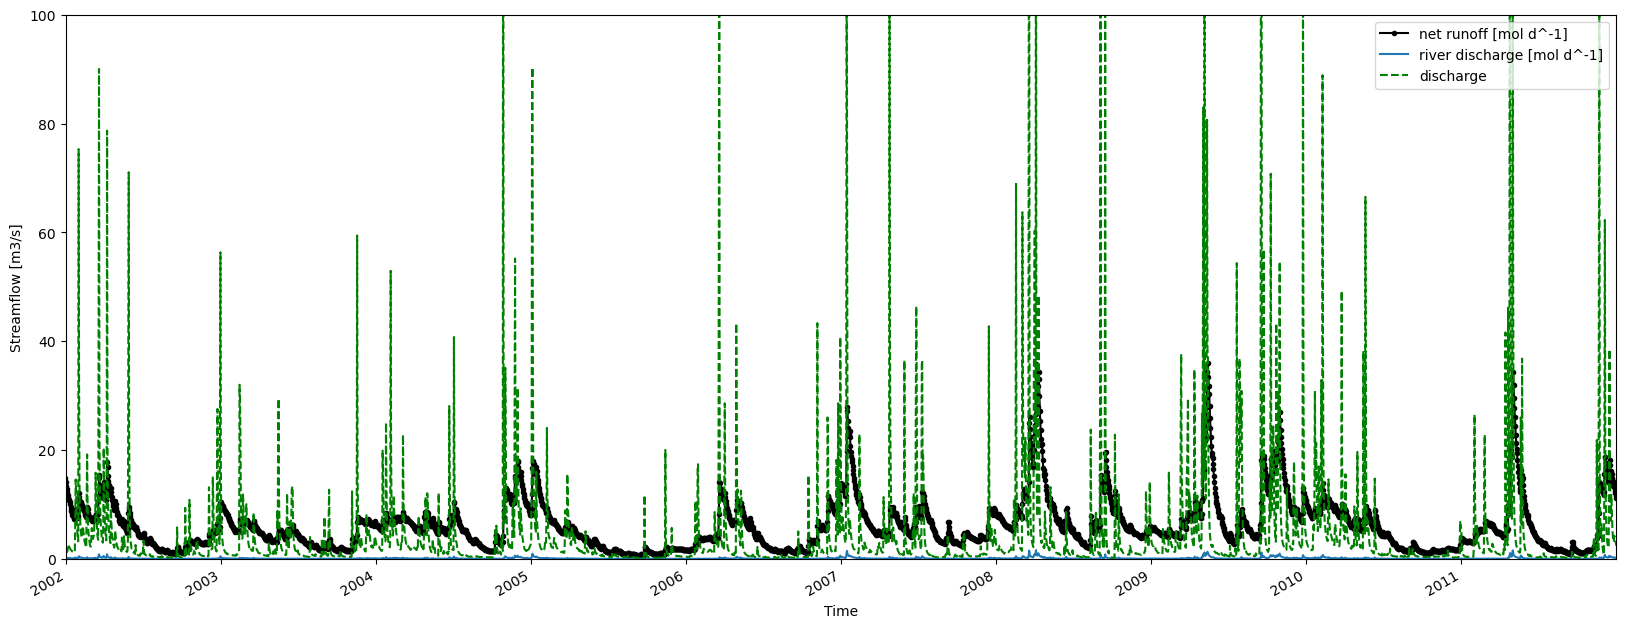

In [13]:
# https://www.aqua-calc.com/calculate/mole-to-volume-and-weight/substance/water

fig, ax = plt.subplots(figsize=[20,8])

df = ats_df['net runoff [mol d^-1]']*1.8e-5/(24*60*60)
df.plot(color='black', style='.-')

df = ats_df['river discharge [mol d^-1]']*(1.8e-5/(24*60*60))
df.plot()
# over the data from USGS gauge station
usgs_data['discharge'].plot(color='green', style='--')

ax.set_xlabel("Time")
ax.set_ylabel("Streamflow [m3/s]")
ax.set_xlim([datetime.date(2002,1,1), datetime.date(2011,12,31)])
#ax.set_xlim([ats_df['date'][0], ats_df['date'][-1]])
#ax.set_xlim([usgs_data.index[0], usgs_data.index[-1]])

ax.set_ylim([0,100])
ax.legend()

#ats_df['net runoff [mol d^-1]']*1.8e-5/(24*60*60)
#ats_df
#ats_df['river discharge [mol d^-1]'],ats_df['river discharge [mol d^-1]']*1.8e-5/(24*60*60)


In [14]:
usgs_data_2 = usgs_data.reindex(edates)
usgs_data_2#['2002-01-01':'2011-12-31']
usgs_data_2['00060_Mean'].to_numpy()

NameError: name 'edates' is not defined

In [15]:
usgs_data_2['2002-01-01':'2011-12-31']
basedate = pd.Timestamp('1980-01-01 00:00:00+00:00')
basedate

NameError: name 'usgs_data_2' is not defined

In [16]:
s = ats_data['sitename'][0]
ats_df = read_ats_obs(ats_data[ats_data['sitename']==s]['fname'].values[0])
edates = ats_df.date
start_date=ats_df.date[0]
end_date=ats_df.date[-1]
print(start_date,end_date)
ats_df

1980-10-01 00:00:00+00:00 2020-10-01 00:00:00+00:00


,time [d],net runoff [mol d^-1],river discharge [mol d^-1],net groundwater flux [mol d^-1],rain precipitation [m d^-1],snow precipitation [m d^-1],air temperature [K],relative humidity [-],incoming shortwave radiation [W m^-2],surface evaporation [m d^-1],snow evaporation [m d^-1],transpiration [m d^-1],snowmelt [m d^-1],infiltration [mol d^-1],canopy evaporation [m d^-1],surface water content [mol],snow water content [mol],canopy water content [mol],subsurface water content [mol],date
date,,,,,,,,,,,,,,,,,,,,
1980-10-01 00:00:00+00:00,274.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.401291e+11,0.000000,2.729823e+09,4.345688e+13,1980-10-01 00:00:00+00:00
1980-10-02 00:00:00+00:00,275.0,1.155015e+10,5.606597e+07,4.002989e-07,0.000000,0.0,2.508843e+07,56169.246659,1.588848e+07,0.000246,0.0,0.001426,0.000000e+00,5.283621e+05,2.259932e-04,1.376140e+11,0.000000,6.263638e+07,4.342811e+13,1980-10-02 00:00:00+00:00
1980-10-03 00:00:00+00:00,276.0,1.106610e+10,5.037776e+07,1.595625e-07,0.000000,0.0,2.490579e+07,50189.528250,1.766362e+07,0.000203,0.0,0.001679,0.000000e+00,4.641844e+05,4.981611e-06,1.351447e+11,0.000000,3.843082e+06,4.339731e+13,1980-10-03 00:00:00+00:00
1980-10-04 00:00:00+00:00,277.0,1.066186e+10,4.834202e+07,-6.158842e-07,0.000000,0.0,2.484204e+07,47947.998230,1.825923e+07,0.000190,0.0,0.001715,0.000000e+00,4.400225e+05,3.206253e-07,1.328460e+11,0.000000,1.121476e+05,4.336647e+13,1980-10-04 00:00:00+00:00
1980-10-05 00:00:00+00:00,278.0,1.023458e+10,4.712839e+07,-3.889846e-07,0.000069,0.0,2.482147e+07,50572.228887,1.731908e+07,0.000175,0.0,0.001537,0.000000e+00,3.313202e+05,8.928307e-06,1.309318e+11,0.000000,4.554672e+07,4.333860e+13,1980-10-05 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-27 00:00:00+00:00,14880.0,7.952813e+10,1.577300e+09,6.468136e-07,0.006751,0.0,2.521699e+07,67326.797595,1.252540e+07,0.000729,0.0,0.000032,1.667944e-10,-4.236021e+06,5.915362e-05,3.493271e+11,802.637008,8.077536e+08,4.548836e+13,2020-09-27 00:00:00+00:00
2020-09-28 00:00:00+00:00,14881.0,7.903241e+10,1.625374e+09,-4.222893e-07,0.004535,0.0,2.504999e+07,66874.521579,1.366432e+07,0.000801,0.0,0.000020,1.504952e-10,-1.497696e+06,9.009805e-05,3.442461e+11,802.608622,6.077442e+08,4.545737e+13,2020-09-28 00:00:00+00:00
2020-09-29 00:00:00+00:00,14882.0,7.530944e+10,1.345123e+09,-1.060816e-06,0.000000,0.0,2.486770e+07,60505.687608,1.761261e+07,0.000623,0.0,0.000173,1.310557e-10,3.789842e+06,3.894817e-05,3.338941e+11,802.580237,1.476461e+08,4.538303e+13,2020-09-29 00:00:00+00:00


In [ ]:
### OLD CODE BELOW
ats_df.columns
usgs_data.index[-1]

In [ ]:
for y in leapyears:
    if (pd.to_datetime("12/30/%d"%(y)) > (basedate + pd.to_timedelta(ats_df['time [d]'].iloc[0], 'd'))) and (pd.to_datetime("12/30/%d"%(y)) < (basedate + pd.to_timedelta(ats_df['time [d]'].iloc[-1], 'd'))):
        print("We need to add date 12/31/%d to the time series: day %d index %d"%(y, (pd.to_datetime("12/31/%d"%(y)) - pd.to_datetime("1/1/1980")).days, ats_df[ats_df['time [d]'] == (pd.to_datetime("12/30/%d"%(y)) - pd.to_datetime("1/1/1980")).days].index[0]+1))
        row=ats_df.loc[[ats_df[ats_df['time [d]']==(pd.to_datetime("12/30/%d"%(y)) - pd.to_datetime("1/1/1980")).days].index[0]],:]
        print('Row: old time %d'%(row['time [d]']))
        ats_df['time [d]'].mask(ats_df['time [d]'] > (pd.to_datetime("12/30/%d"%(y)) - pd.to_datetime("1/1/1980")).days, ats_df['time [d]'] + 1, inplace=True)
#       row = ats_df.loc[[ats_df[ats_df.date == pd.to_datetime('12/30/%d'%(y))].index[0]], :]
        row['time [d]'] = (pd.to_datetime("12/30/%d"%(y)) - pd.to_datetime("1/1/1980")).days + 1
        row.index = [ats_df[ats_df['time [d]'] == (pd.to_datetime("12/30/%d"%(y)) - pd.to_datetime("1/1/1980")).days].index[0]]
        ats_df = ats_df.append(row).sort_index()
        print('Row: new time %d'%(row['time [d]']))
 
        #row['time [d]'] = row['time [d]'] + 1
        #pd.concat()
        #row.index = [3.5]
        #x = x.append(x1, ignore_index=False).sort_index().reset_index(drop=True)

        
        #print(row)
    else:
        print("Leap day 2/29/%d falls outside simulation time period"%(y))
        
# make datetime the index for the dataframe
ats_df['date'] = basedate + pd.to_timedelta(ats_df['time [d]'], 'd')
ats_df.set_index(pd.DatetimeIndex(ats_df.date), inplace=True)
ats_df['date'] = basedate + pd.to_timedelta(ats_df['time [d]'], 'd')
ofname=ats_fname+'.mod'
ats_df.to_csv(ofname)

In [ ]:
site = '7340300'
df3 = nwis.get_record(sites=site, service='site')
df3

In [111]:
# Get data from USGS station
usgs_sitecode='07340300'
site_info = nwis.get_record(site=usgs_sitecode, service='site')
df = nwis.get_record(sites=usgs_sitecode, service='dv', start='1997-01-01', end='2020-12-31', parameterCd='00060')
# convert cub ft per sec to cub m per sec
discharge = df['00060_Mean']*0.028
#site_info.columns
#print(site_info.huc_cd)
site_info #.huc_cd[0]
#site_info.columns
df

,00060_Mean,00060_Mean_cd,site_no
datetime,,,
1997-01-01 00:00:00+00:00,83.0,A,07340300
1997-01-02 00:00:00+00:00,79.0,A,07340300
1997-01-03 00:00:00+00:00,76.0,A,07340300
1997-01-04 00:00:00+00:00,74.0,A,07340300
1997-01-05 00:00:00+00:00,67.0,A,07340300
...,...,...,...
2020-12-27 00:00:00+00:00,43.2,A,07340300
2020-12-28 00:00:00+00:00,41.5,A,07340300
2020-12-29 00:00:00+00:00,39.2,A,07340300


In [114]:
#site_info1 = get_info_USGSsite('07340300')
#print(site_info)
#print(site_info1)
site_info

,agency_cd,site_no,station_nm,site_tp_cd,lat_va,long_va,dec_lat_va,dec_long_va,coord_meth_cd,coord_acy_cd,...,local_time_fg,reliability_cd,gw_file_cd,nat_aqfr_cd,aqfr_cd,aqfr_type_cd,well_depth_va,hole_depth_va,depth_src_cd,project_no
0,USGS,07340300,"Cossatot River near Vandervoort, AR",ST,342248,941411,34.38,-94.236389,G,T,...,Y,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
site_info1

,agency_cd,site_no,station_nm,site_tp_cd,dec_lat_va,dec_long_va,coord_acy_cd,dec_coord_datum_cd,alt_va,alt_acy_va,alt_datum_cd,huc_cd,drain_sqkm,hcdn_2009,geometry
0,USGS,07340300,"Cossatot River Near Vandervoort, AR",ST,34.38,-94.236389,T,NAD83,771.74,0.2,NAVD88,11140109,230.4347,True,POINT (-94.23639 34.38000)


In [15]:
print(pd.to_datetime("1/1/1980"))
print(pd.to_datetime("2/29/1980"))
print((pd.to_datetime("2/29/1980") - pd.to_datetime("1/1/1980")).days)

1980-01-01 00:00:00
1980-02-29 00:00:00
59


In [16]:
print("Lat: %f Lon: %f"%(site_info.dec_lat_va, site_info.dec_long_va))
ats_df.head()
#print(ats_df[ats_df['time [d]']==277].index)
#pd.to_datetime("12/30/1984")+pd.DateOffset(1520)
c = (row.index + 0.5).astype(float)
#row.iloc[0]['time [d]'] = row.iloc[0]['time [d]'] + 1
row.iloc[0]['time [d]'] = row['time [d]']+1


Lat: 31.027680 Lon: -86.709957


NameError: name 'row' is not defined

In [ ]:
#ats_df[ats_df['time [d]']>276]['time [d]'] = ats_df[ats_df['time [d]']>276]['time [d]'] + 1
ats_df['time [d]'].mask(ats_df['time [d]'] > 277, ats_df['time [d]'] + 1, inplace=True)
row = ats_df.loc[ats_df['time [d]'] == 277].copy(deep=True)
#row['time [d]'].iloc[0] = row['time [d]'] + 1
#ats_df.loc[3.5] = row
ats_df
row is deep
#row = ats_df.loc[ats_df['time [d]'] == 277]

In [ ]:
all_info = nwis.get_info(huc="06010202", siteType='ST')
all_info

In [ ]:

ats_csv = pd.read_csv(ats_fname)

# dimension variables 
nb = 2 # bounds 
nsites = 1 
time = len(ats_csv.datetime)
print(nb, nsites, time)

watershed_name = ['ARW']
huc10 = '1802011102'
lat = ['46.977616']
lon = ['-121.168696']

In [ ]:
# make datetime the index for the dataframe
ats_csv.set_index(pd.DatetimeIndex(ats_csv.datetime), inplace=True)
# convert datetime column to datetime datatype
ats_csv.datetime = pd.to_datetime(ats_csv.datetime)
# calculate days from the first date
t  = np.array([t.total_seconds()/3600/24 for t in (ats_csv.datetime-ats_csv.datetime[0])])
# create time bounds array
tb = np.array([t,t+1]).T

In [ ]:
#ats_csv.datetime, t, tb
vars = ats_csv.columns
vars = vars.drop(['datetime', 'time [d]'])


for v in ats_csv.columns:
    if v == 'datetime':
        continue
    print(v)
    print("\"%s\""%(v.split('[')[0].strip().replace(' ', '_').replace('+', '_').replace('(', '').replace(')', '')))
#    print(v.split('[')[0].strip().replace(' ', '_'))
    print(v.split('[')[1].split(']')[0])
#    print(ats_csv[v])

out_ds = xr.Dataset()
# add time 
out_ds["time"] = xr.DataArray("time", ats_csv.datetime)
out_ds

test = ats_csv.drop(columns=['datetime', 'time [d]'])

out_ds = test.to_xarray()

data_dict = {v.split('[')[0].strip().replace(' ', '_'): (('time', 'nsites'), ats_csv[v]) for v in vars}
#data_dict['time'] = t
#data_dict['time_bounds'] = tb

test = pd.DataFrame(data_dict) #, index=ats_csv.index)

v.split('[')[0].strip().replace(' ', '_')
ats_csv[v].to_numpy().reshape(ntime, nsites).shape

In [ ]:
# convert to xarray
out_ds = xr.Dataset({})

# add coordinates of the sites where the observations are located from model and the USGS stations
out_ds['lat'] = (('nsites'), lat)
out_ds['lat'].attrs['standard_name'] = 'latitude'
out_ds['lat'].attrs['long_name'] = 'site latitude'
out_ds['lat'].attrs['units'] = 'degrees_north'

out_ds['lon'] = (('nsites'), lon)
out_ds['lon'].attrs['standard_name'] = 'longitude'
out_ds['lon'].attrs['long_name'] = 'site longitude'
out_ds['lon'].attrs['units'] = 'degrees_east'

# update time variable attrs
out_ds['time'] = (('time'), t)
out_ds['time_bounds'] = (('time', 'nb'), tb)
out_ds['time'].attrs['units'] = "days since %s" % ats_csv.datetime[0]
out_ds['time'].attrs['calendar'] = "standard"
out_ds['time'].attrs['bounds'] = "time_bounds"

# Loop over variables and set attributes 
for v in vars:
    out_ds[v.split('[')[0].strip().replace(' ', '_').replace('+', '_').replace('(', '').replace(')', '')] = (('time', 'nsites'), ats_csv[v].to_numpy().reshape(time, nsites))
    out_ds[v.split('[')[0].strip().replace(' ', '_').replace('+', '_').replace('(', '').replace(')', '')].attrs['units'] = v.split('[')[1].split(']')[0]
    out_ds[v.split('[')[0].strip().replace(' ', '_').replace('+', '_').replace('(', '').replace(')', '')].attrs['long_name'] = v.split('[')[0] #.strip().replace(' ', '_')
    print(v.split('[')[0].strip().replace(' ', '_').replace('+', '_').replace('(', '').replace(')', ''), v.split('[')[1].split(']')[0], v.split('[')[0])
   
out_ds.to_netcdf('ats_output.nc')


In [ ]:
#out_ds.to_netcdf('ats_output.nc')
#v.split('[')[0].strip().replace(" ", "_").replace('+', '_')

In [ ]:
ats_csv['watershed boundary discharge [mol d^-1]'].head()

In [ ]:
ats_csv['watershed boundary discharge [m^3/d]'].head()

In [ ]:
out_ds['time_bounds'][1185], out_ds['time'][1185]

In [ ]:
out_ds['time_bounds'][1186], out_ds['time'][1186]

In [ ]:
ats_csv.datetime[1185], ats_csv.datetime[1186]

In [ ]:
#if (ats_csv.datetime.index.year % 400 == 0) and (ats_csv.datetime.index.year % 100 == 0):
#    print("Its a leap year")
for y in range(1998, 2020+1):
    print(y, len(ats_csv.datetime[ats_csv.datetime.index.year == y])) # and ats_csv.datetime.index.year == 2000]

In [ ]:
#ats_csv.datetime.index.month == 12
x.loc[[3],:]
x1

In [ ]:
import pandas as pd
x = pd.DataFrame.from_dict({'A':[1,2,3,4,5,6], 'B':[10, 20, 30, 44, 48, 81]})
x1=x.loc[[3],:]
x1.A=2
x1.B=7
x1.index = [3.5]
x = x.append(x1, ignore_index=False).sort_index().reset_index(drop=True)

#x.loc[3.5] = x1
#x_new = pd.concat([x,x1]).sort_index()
x

In [ ]:
x_new.loc[4,'A'] = 10

In [ ]:
x_new